In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [2]:
from sklearn.svm import SVC

In [4]:
df.columns

Index(['title', 'reviews', 'rating', 'sarcastic', 'positive', 'negative',
       'neutral', 'admiration', 'angry'],
      dtype='object')

In [3]:
df = pd.read_csv("AMAZON sarcasm.csv", encoding = 'unicode_escape')

In [176]:
df.dtypes

title         object
reviews       object
rating         int64
sarcastic      int64
positive       int64
negative       int64
neutral        int64
admiration     int64
angry          int64
dtype: object

In [26]:
# df['angry'] = df['angry'].astype(int)

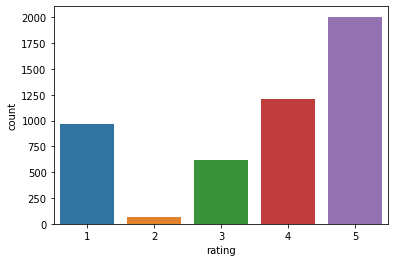

In [34]:
sns.countplot(df['rating'])

In [177]:
df = df.sample(4863)

In [5]:
import string
import regex as re
def clean_text(text):
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,\"\'!@#$%^*(){}?/;`~:<>+=-]", " ", text)
    text = re.sub(r"\n", "", text)
    text = re.sub(r"&", "and", text)
    return text

In [6]:
reviews = []
for review in df['reviews']:
    a = clean_text(review)
    reviews.append(a)

In [206]:
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

stopwords = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

rem = ['not', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', 
       "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', 
       "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'don', "don't", 
       'just', 'too', 'very', 'no', 'nor', 'only', 'own', 'same', 'again', 'against', 'but',]
for s in rem:
    stopwords.remove(s)

In [7]:
def tokenize(review):
    ret_str = ''
    review = review.split()
    for r in review:
        if lemmetiz(r) not in stopwords:
            ret_str +=lemmetiz(r)
            ret_str +=' '
    return ret_str

In [8]:
def lemmetiz(word):
    lem = wordnet_lemmatizer.lemmatize(word,'v')
    return lem

In [262]:
dir(nfx)
# Explore For Noise
# df['reviews'].apply(nfx.remove_stopwords)
corpus = df['reviews'].apply(nfx.remove_stopwords)

In [234]:
d = []
for i in reviews:
    p = tokenize(i)
    d.append(p)
tokens = tfidf.fit_transform(d)
tokens = tokens.toarray()


In [9]:
tfidf = TfidfVectorizer()
# Build Features
Xfeatures = tfidf.fit_transform(reviews).toarray()

In [10]:
y = df[['sarcastic', 'positive', 'negative','neutral', 'admiration', 'angry']]

In [11]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.15,random_state=5)

In [12]:
X_train.shape

(4134, 8493)

# Binary Relevence

In [15]:
# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)
# Predictions
br_prediction = binary_rel_clf.predict(X_test)


In [16]:
br_prediction = br_prediction.toarray()

In [312]:
# br_prediction

In [313]:
# y_test.values

In [17]:
# Accuracy
accuracy_score(y_test,br_prediction)



0.31917808219178084

In [18]:
# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.16506849315068492

In [19]:
#etate gaussian NB
from sklearn.naive_bayes import GaussianNB

gnb = BinaryRelevance(GaussianNB())
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [20]:
#accuracy for gauss 
print("accuracy ",accuracy_score(y_test,y_pred))
print("ham_loss",hamming_loss(y_test,y_pred))

accuracy  0.21506849315068494
ham_loss 0.30182648401826484


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
# clf = BinaryRelevance(RandomForestClassifier(n_estimators=100))
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)

In [22]:
print("accuracy ",accuracy_score(y_test,y_pred))
print("ham_loss",hamming_loss(y_test,y_pred))


accuracy  0.43424657534246575
ham_loss 0.1365296803652968


In [23]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score

multilabel_confusion_matrix(y_test,br_prediction)



array([[[658,   0],
        [ 72,   0]],

       [[245, 120],
        [ 27, 338]],

       [[544,   3],
        [ 80, 103]],

       [[548,   0],
        [178,   4]],

       [[583,   0],
        [147,   0]],

       [[612,   8],
        [ 88,  22]]], dtype=int64)

In [24]:
precision_score(y_test,br_prediction, average= None)

C:\Users\Rif010\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.73799127, 0.97169811, 1.        , 0.        ,
       0.73333333])

In [25]:
print("micro: {:.2f}".format(precision_score(y_test,br_prediction, average= 'micro')))
print("macro: {:.2f}".format(precision_score(y_test,br_prediction, average= 'macro')))
print("weighted: {:.2f}".format(precision_score(y_test,br_prediction, average= 'weighted')))
print("samples: {:.2f}".format(precision_score(y_test,br_prediction, average= 'samples')))

micro: 0.78
macro: 0.57
weighted: 0.67
samples: 0.60


C:\Users\Rif010\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rif010\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rif010\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn import metrics

print("micro: {:.2f}".format(metrics.average_precision_score(y_test,br_prediction, average= 'micro')))
print("macro: {:.2f}".format(metrics.average_precision_score(y_test,br_prediction, average= 'macro')))
print("weighted: {:.2f}".format(metrics.average_precision_score(y_test,br_prediction, average= 'weighted')))
print("samples: {:.2f}".format(metrics.average_precision_score(y_test,br_prediction, average= 'samples')))


micro: 0.48
macro: 0.37
weighted: 0.47
samples: 0.60


In [27]:
from sklearn.metrics import classification_report

output_label = ['sarcastic', 'positive', 'negative','neutral', 'admiration', 'angry']
print(classification_report(y_test,br_prediction,target_names=output_label))


              precision    recall  f1-score   support

   sarcastic       0.00      0.00      0.00        72
    positive       0.74      0.93      0.82       365
    negative       0.97      0.56      0.71       183
     neutral       1.00      0.02      0.04       182
  admiration       0.00      0.00      0.00       147
       angry       0.73      0.20      0.31       110

   micro avg       0.78      0.44      0.56      1059
   macro avg       0.57      0.29      0.32      1059
weighted avg       0.67      0.44      0.45      1059
 samples avg       0.60      0.47      0.51      1059



C:\Users\Rif010\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rif010\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.model_selection import cross_validate, KFold
clf = RandomForestClassifier(n_estimators=100)
k_fold = KFold(n_splits = 5 , shuffle = False)
k_fold
scores = cross_validate(clf, X_train,y_train, cv = k_fold, scoring = ['accuracy'])

In [31]:
scores

{'fit_time': array([48.98173785, 69.20634508, 57.06050205, 47.33929777, 47.16790819]),
 'score_time': array([0.57898831, 0.95723081, 0.54542375, 0.55640531, 0.56394887]),
 'test_accuracy': array([0.4401451 , 0.44619105, 0.41475212, 0.47279323, 0.44915254])}

In [32]:
clf = BinaryRelevance(MultinomialNB())
k_fold = KFold(n_splits = 8 , shuffle = False)#, random_state = 24)
k_fold
scores = cross_validate(clf, X_train,y_train, cv = k_fold, scoring = ['accuracy'],error_score='raise')
scores

{'fit_time': array([5.41730547, 5.23991656, 5.32826185, 5.23438358, 5.27132583,
        5.34135628, 5.30242157, 5.25483155]),
 'score_time': array([0.31234908, 0.31250405, 0.29674196, 0.31248784, 0.29673266,
        0.32798743, 0.29688072, 0.29673243]),
 'test_accuracy': array([0.32495164, 0.34816248, 0.31334623, 0.29206963, 0.31914894,
        0.31141199, 0.32751938, 0.34689922])}

# Classifier Chain to preserve label correlation

In [16]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)
clf_chain_model

{'accuracy:': 0.3958904109589041, 'hamming_score': 0.15776255707762557}

In [322]:
gnb = GaussianNB()
clf_chain_model = build_model(gnb,ClassifierChain,X_train,y_train,X_test,y_test)
clf_chain_model

{'accuracy:': 0.2356164383561644, 'hamming_score': 0.24771689497716895}

In [34]:
clf = ClassifierChain(MultinomialNB())
k_fold = KFold(n_splits = 10, shuffle = False)#, random_state = 24)
k_fold
scores = cross_validate(clf, X_train,y_train, cv = k_fold, scoring = ['accuracy'],error_score='raise')
scores

{'fit_time': array([6.1130569 , 5.28915381, 5.22007012, 5.1248405 , 5.06982136,
        5.3000989 , 5.07914829, 5.1082902 , 5.17187047, 5.09144378]),
 'score_time': array([0.52578616, 0.468611  , 0.46861696, 0.53876257, 0.50907731,
        0.45326281, 0.48436975, 0.50000882, 0.48452687, 0.50000262]),
 'test_accuracy': array([0.4057971 , 0.4468599 , 0.39855072, 0.37681159, 0.37046005,
        0.36803874, 0.42615012, 0.3874092 , 0.3874092 , 0.40193705])}

In [35]:
clf = ClassifierChain(RandomForestClassifier(n_estimators=100))
k_fold = KFold(n_splits = 8 , shuffle = False)#, random_state = 24)
k_fold
scores = cross_validate(clf, X_train,y_train, cv = k_fold, scoring = ['accuracy'],error_score='raise')
scores

{'fit_time': array([142.27369809, 143.49477506, 141.18885899, 141.9682703 ,
        142.11862016, 144.42072654, 142.21877551, 148.29473019]),
 'score_time': array([1.2189033 , 1.21818781, 1.21876001, 1.21859646, 1.20303202,
        1.20217967, 1.25014091, 1.21875215]),
 'test_accuracy': array([0.49709865, 0.52224371, 0.5106383 , 0.4893617 , 0.53578337,
        0.50483559, 0.51356589, 0.48643411])}

In [17]:
rf = RandomForestClassifier(n_estimators=100)
clf_chain_model = build_model(rf,ClassifierChain,X_train,y_train,X_test,y_test)
clf_chain_model

{'accuracy:': 0.5123287671232877, 'hamming_score': 0.13219178082191782}


# Label PowerSet

In [323]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)
clf_labelP_model

{'accuracy:': 0.4383561643835616, 'hamming_score': 0.17077625570776256}

In [324]:
clf_labelP_model = build_model(gnb,LabelPowerset,X_train,y_train,X_test,y_test)
clf_labelP_model

{'accuracy:': 0.36164383561643837, 'hamming_score': 0.2228310502283105}

In [22]:
# rf = RandomForestClassifier(n_estimators=300)
# clf_labelP_model = build_model(rf,LabelPowerset,X_train,y_train,X_test,y_test)
rf_pred = clf_labelP_model.predict(X_test)

AttributeError: 'dict' object has no attribute 'predict'

In [20]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score

multilabel_confusion_matrix(y_test,rf_pred)


NameError: name 'rf_pred' is not defined

In [51]:
### Apply On A Simple Ttitle/Question
# ex1 = df['reviews'].iloc[98]
ex1 = '(https://amazon.com) this website/ is the-best for gadgets'
# Make our prediction
ex1 = clean_text(ex1)
print(ex1)
vec_example = tfidf.transform([ex1])
rf.predict(vec_example)

the product suck


array([1])

# Adaption

In [345]:
#### Adapted Algorithm
from skmultilearn.adapt import MLkNN

In [378]:
classifier = MLkNN(k=100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

AttributeError: 'DataFrame' object has no attribute 'getformat'

# OnevsRest

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier


In [24]:
logreg = Pipeline([('clf',OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
logreg.fit(X_train,y_train)

Pipeline(steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(solver='sag'),
                                     n_jobs=-1))])

In [25]:
ypred = logreg.predict(X_test)

In [27]:
accuracy_score(y_test,ypred)

0.4328767123287671

In [374]:
hamming_loss(y_test,y_pred)

0.13333333333333333

In [28]:
logreg = Pipeline([('rf',OneVsRestClassifier(LogisticRegression(solver='lbfgs'), n_jobs=-1)),])
logreg.fit(X_train,y_train)

ypred = logreg.predict(X_test)

In [30]:
accuracy_score(y_test,ypred)

0.4328767123287671

In [32]:
hamming_loss(y_test,ypred)

0.13789954337899543